In [15]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [16]:
DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW/"

#masks_dir = sorted(glob.glob(DATA_ROOT+"/dataset/JPEGImages_used/resize/*_mask_viz_resized_mask_viz.png"))
masks_dir = sorted(glob.glob(DATA_ROOT+"/dataset/JPEGImages_used/resize/*_mask_resized_mask.png"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/dataset/JPEGImages_used/resize/*_training_resized_training.png"))

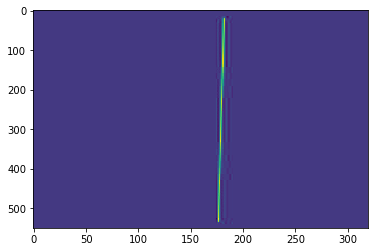

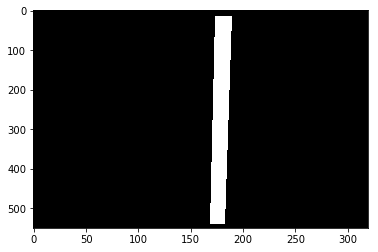

In [17]:
X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

X_data=np.array(X_data)
Y_data=np.array(Y_data)

plt.imshow(X_data[1,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.show()
plt.imshow(Y_data[1,...,], aspect="auto",cmap='gray')
plt.show()

In [20]:
data_provider = image_util.ImageDataProvider(DATA_ROOT+"/dataset/JPEGImages_used/resize/*",data_suffix="_training_resized_training.png", mask_suffix="_mask_resized_mask.png")

Number of files used: 10


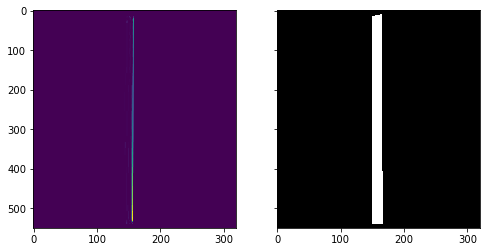

In [22]:
x_test, y_test = data_provider(1)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto",cmap='gray')
plt.show()

In [23]:
print(x_test.shape)
print(y_test.shape)

print(data_provider.channels)
print(data_provider.n_class)

(1, 550, 320, 3)
(1, 550, 320, 2)
3
2


In [24]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)

trainer = unet.Trainer(net, optimizer="adam")


2017-11-06 13:42:48,534 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [25]:
path = trainer.train(data_provider, output_path="out", training_iters=32, epochs=3,dropout=0.75, display_step=2)

2017-11-06 13:43:39,055 Removing '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-06 13:43:39,057 Removing '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-06 13:43:39,058 Allocating '/Users/cesare.chung/int/01_CODE_UNET/prediction'
2017-11-06 13:43:39,059 Allocating '/Users/cesare.chung/int/01_CODE_UNET/out'
2017-11-06 13:44:23,224 Verification error= 5.6%, loss= 0.6549
2017-11-06 13:44:27,735 Start optimization
2017-11-06 13:45:01,728 Iter 0, Minibatch Loss= 0.5286, Training Accuracy= 0.9429, Minibatch error= 5.7%
2017-11-06 13:45:59,348 Iter 2, Minibatch Loss= 0.6411, Training Accuracy= 0.9340, Minibatch error= 6.6%
2017-11-06 13:46:55,829 Iter 4, Minibatch Loss= 0.3459, Training Accuracy= 0.9412, Minibatch error= 5.9%
2017-11-06 13:48:00,966 Iter 6, Minibatch Loss= 0.4608, Training Accuracy= 0.9411, Minibatch error= 5.9%
2017-11-06 13:48:57,120 Iter 8, Minibatch Loss= 0.4650, Training Accuracy= 0.9358, Minibatch error= 6.4%
2017-11-06 13:50:01,968 Iter 10, Minibatch Loss

In [26]:
x_test, y_test = data_provider(1)


In [27]:
prediction = net.predict("./out/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-06 14:46:33,785 Restoring parameters from ./out/model.cpkt
2017-11-06 14:46:34,119 Model restored from file: ./out/model.cpkt


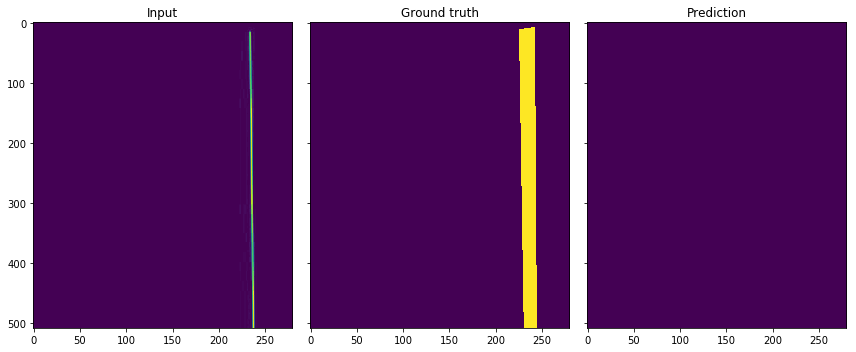

In [28]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

In [29]:
unet.error_rate(prediction, util.crop_to_shape(y_test, prediction.shape))


5.5336051743532124

In [30]:
img = util.combine_img_prediction(x_test,y_test,prediction)
util.save_image(img, "/Users/cesare.chung/int/mura_problem.png")
